#### Miscelaneous

In [28]:
# Some helper functions
from typing import List, Dict
import json
import openpyxl


def pprint_dict(a_dict: Dict):
    print(json.dumps(a_dict, indent=4, sort_keys=True))
 
def pprint_list(a_list: List):
    for rec in a_list:
        print(rec)
        

In [1]:

# Asking for user input:
a_number = input("Enter a float number: ")
print("You entered {0}".format(a_number))

Enter a float number: 12
You entered 12


In [2]:
def safe_float(a_number: int) -> float:
    try:
        a_float = float(a_number) # Convert to float.
    except ValueError as err:
        print(err)
        a_float = None
    return a_float

In [8]:
def safe_float2(a_number: int) -> (bool,float):
    try:
        return True, float(a_number) # Convert to float.
    except ValueError as err:
        print(err)
        return False, None
    

In [9]:
a_number = input("Enter a float number: ")
success, a_float = safe_float2(a_number) # Convert to float.
if not success:
    print('Not a float!')
else:
    print(a_float) 

Enter a float number: a
could not convert string to float: 'a'
Not a float!


In [12]:
a_number = input("Enter a float number: ")
a_float = safe_float(a_number) # Convert to float.
if a_float is None:
    print('Not a float!')
else:
    print(a_float) 

Enter a float number: 12
12.0


In [13]:
x1 = 12
x2 = '12.9'
print(type(x1))
print(type(x2))
str(x1) + x2

<class 'int'>
<class 'str'>


'1212.9'

In [79]:
x = 1; y = 2
x + y
x = 'hello '; y = 'jack'
x * 3

'hello hello hello '

#### Randomizing from options.

In [26]:
# Randomly selecting from a list of options.
from random import choice

possible_locations = ["California", "New York", "Arizona", "Alaska", "Texas"]

def select_location(): 
    """Return random location from the possible locations."""
    return choice(possible_locations)

print('Event location: {0}'.format(select_location()))

Event location: New York


In [29]:
from random import choice
dice_roll = [1, 2, 3, 4, 5, 6]

def roll_dice(): 
    """Return random location from the possible locations."""
    return choice(dice_roll)

result = {x:0 for x in range(1,13)}

for _ in range(100000):
    curr_result = roll_dice()+roll_dice()
    result[curr_result] += 1

pprint_dict(result)

{
    "1": 0,
    "2": 2751,
    "3": 5522,
    "4": 8377,
    "5": 11046,
    "6": 14068,
    "7": 16408,
    "8": 13932,
    "9": 11110,
    "10": 8369,
    "11": 5557,
    "12": 2860
}


In [30]:
help(choice)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.



In [31]:
def my_func(a, b, c):
    """
    This is my function to add 3 numbers.
        a: integer
        b: integer
        c: integer
    """
    return a+b+c

In [32]:
help(my_func)

Help on function my_func in module __main__:

my_func(a, b, c)
    This is my function to add 3 numbers.
        a: integer
        b: integer
        c: integer



In [33]:
def my_func2(a: int, b: int, c: int) -> int:
    """
    This is a function to add 3 integers.
    """
    return a+b+c

In [34]:
help(my_func2)

Help on function my_func2 in module __main__:

my_func2(a: int, b: int, c: int) -> int
    This is a function to add 3 integers.



In [35]:
import matplotlib.pyplot as plt
# help(plt)
from os.path import join
help(join)

Help on function join in module posixpath:

join(a, *p)
    Join two or more pathname components, inserting '/' as needed.
    If any component is an absolute path, all previous path components
    will be discarded.  An empty last part will result in a path that
    ends with a separator.



In [87]:
pprint_dict(result)

{
    "1": 0,
    "2": 2569,
    "3": 5475,
    "4": 8475,
    "5": 11101,
    "6": 13888,
    "7": 16640,
    "8": 13920,
    "9": 11136,
    "10": 8250,
    "11": 5724,
    "12": 2822
}


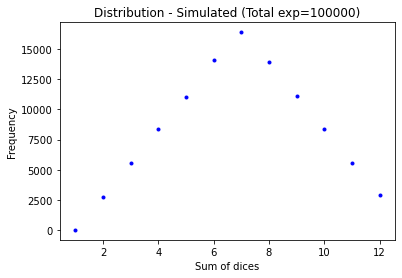

In [36]:
# Basic visualization.
%matplotlib inline
import matplotlib.pyplot as plt
x = result.keys()
y = result.values()
total_expr = sum(y)
plt.title(f'Distribution - Simulated (Total exp={total_expr})')
plt.xlabel('Sum of dices')
plt.ylabel('Frequency')
plt.plot(x, y, '.', color='blue', );

#### More simulations

In [37]:
# Randomly selecting from list of options.
from random import choice
from collections import defaultdict

pos_values = [1, 2, 3, 4, 5, 6]

def roll_the_dices(num_dices): 
    return [choice(pos_values) for _ in range(num_dices)]

NUM_EXPR = 10_000_000
results = defaultdict(int)
for _ in range(NUM_EXPR):
    sum_dices = sum(roll_the_dices(2))
    results[sum_dices] += 1
 
acc = 0
print(' ')
print('Prob of each outcome')
for key, value in sorted(results.items()):
    perc = (value/NUM_EXPR)*100
    acc += perc
    print(' {0} = {1:.3f}'.format(key, perc))

print(' ')
print('Cummulative prob')
acc = 0
for key, value in sorted(results.items()):
    perc = (value/NUM_EXPR)*100
    acc += perc
    print(' {0} = {1:.3f}'.format(key, acc))


 
Prob of each outcome
 2 = 2.782
 3 = 5.552
 4 = 8.317
 5 = 11.118
 6 = 13.886
 7 = 16.655
 8 = 13.912
 9 = 11.100
 10 = 8.344
 11 = 5.553
 12 = 2.781
 
Cummulative prob
 2 = 2.782
 3 = 8.334
 4 = 16.651
 5 = 27.769
 6 = 41.655
 7 = 58.310
 8 = 72.223
 9 = 83.323
 10 = 91.667
 11 = 97.219
 12 = 100.000


In [42]:
def run_expreriment(num_times: int, func_to_call) -> Dict:
    results = defaultdict(int)
    for _ in range(num_times):
        result = func_to_call()
        results[result] += 1
    return results

def get_dice_count():
    return sum(roll_the_dices(2))

NUM_EXPR = 10_000_000
exp_results = run_expreriment( NUM_EXPR,get_dice_count)
print(exp_results)

defaultdict(<class 'int'>, {7: 1665377, 8: 1388681, 4: 834212, 9: 1112559, 10: 833892, 12: 277925, 5: 1111456, 6: 1387215, 11: 555835, 3: 555209, 2: 277639})


- Notice that the total adds to close to 100!

#### Note: some list manipulation tricks

In [39]:
in_list = list(range(4))
print(in_list)
x = [1 for _ in in_list]  # Generates a bunch of ones.
print(x)

[0, 1, 2, 3]
[1, 1, 1, 1]


In [40]:
a, b, _, _ = in_list  # Selective unpacking.
print(a, b)

0 1


#### Back to dices.

In [43]:
roll_the_dices(4)

[6, 3, 3, 6]

In [99]:
# Chances of getting a 6 after throwing a dice twice.
prob_single_combination = 1.0/36   # Two dice.

# These are the possible combinations to get a sum = 6
# 1 and 5
# 2 and 4
# 3 and 3
# 5 and 1
# 4 and 2
print('{0}%'.format(round(prob_single_combination * 5 * 100, 2)))

13.89%


#### More Json manipulation

In [63]:
movies_str = """
[
  {
    "name": "The Exorcist",
    "release": 1982,
    "genre": ["Horror"]
  },
  {
    "name": "Inception",
    "release": 2010,
    "genre": ["Fantasy"]
  },
  {
    "name": "Brazil",
    "release": 1985,
    "genre": ["Science Fiction", "Comedy"]
  },
  {
    "name": "The Dark Knight ",
    "release": 2008,
    "genre": ["Super Hero"]
  }
]
"""

another_str = """

  {
    "name": "The Exorcist",
    "release": 1982,
    "genre": ["Horror"]
  }
"""

import json
# This variable contains a list where each element is a dictionary.
movies_json = json.loads(movies_str)
print(type(movies_json))
# This variable contains a dictionary.
another_json = json.loads(another_str)
print(type(another_json))

<class 'list'>
<class 'dict'>


In [64]:
pprint_dict(another_json)

{
    "genre": [
        "Horror"
    ],
    "name": "The Exorcist",
    "release": 1982
}


In [65]:
pprint_list(movies_json)

{'name': 'The Exorcist', 'release': 1982, 'genre': ['Horror']}
{'name': 'Inception', 'release': 2010, 'genre': ['Fantasy']}
{'name': 'Brazil', 'release': 1985, 'genre': ['Science Fiction', 'Comedy']}
{'name': 'The Dark Knight ', 'release': 2008, 'genre': ['Super Hero']}


In [66]:
# Extracting a field from each element from the list.
release_dates = [(rec['name'], rec['release']) for rec in movies_json]
print(release_dates)

[('The Exorcist', 1982), ('Inception', 2010), ('Brazil', 1985), ('The Dark Knight ', 2008)]


In [67]:
# A Safer way to extract a field from each element from the list.
movies_json2 = movies_json.copy()
# Remove release info from the first element if exists.
if 'release' in movies_json2[0]:
    del movies_json2[0]['release']
release_dates = [(x.get('name', 'No Name'), x.get('release', '<release unknown>')) for x in movies_json2]
pprint_list(release_dates)

('The Exorcist', '<release unknown>')
('Inception', 2010)
('Brazil', 1985)
('The Dark Knight ', 2008)


In [68]:
# Get function allows you to return some default value if not found.
a = {1:10, 2:20}
print(a[1])
print(a.get(3, None))

10
None


In [69]:
# Avoid.
def get_2nd_genre_if_elses(json_arr, idx):
    if len(json_arr) < idx:
        result = None
    else:
        rec = json_arr[idx]
        # print(rec)
        genres = rec.get('genre', None)
        if not genres:
            result = None
        else:
            if len(genres) < 2:
                return None
            else:
                result = genres[1]
    return result


In [70]:
def get_2nd_genre(json_arr, idx):
    if len(json_arr) < idx:
        return None
    rec = json_arr[idx]
    # print(rec)
    genres = rec.get('genre', None)
    if not genres:
        return None
    if len(genres) < 2:
        return None
    return genres[1]

print(get_2nd_genre(movies_json2, 3))

None


In [71]:
# Writing Json to file.
file_name = 'movies.json'
with open(file_name, "w") as out_file:
    json_str = json.dumps(movies_json)
    out_file.write(json_str)

In [72]:
movies_json.append("{'name': 'New', 'release': 2020, 'genre': ['Scifi']}")
print(movies_json)

[{'name': 'The Exorcist', 'genre': ['Horror']}, {'name': 'Inception', 'release': 2010, 'genre': ['Fantasy']}, {'name': 'Brazil', 'release': 1985, 'genre': ['Science Fiction', 'Comedy']}, {'name': 'The Dark Knight ', 'release': 2008, 'genre': ['Super Hero']}, "{'name': 'New', 'release': 2020, 'genre': ['Scifi']}"]


In [73]:
# Reading Json from file.
with open(file_name, "r") as in_file:
    json_reloaded = json.load(in_file)
    for elm in json_reloaded:
        print(elm)

{'name': 'The Exorcist', 'genre': ['Horror']}
{'name': 'Inception', 'release': 2010, 'genre': ['Fantasy']}
{'name': 'Brazil', 'release': 1985, 'genre': ['Science Fiction', 'Comedy']}
{'name': 'The Dark Knight ', 'release': 2008, 'genre': ['Super Hero']}


##### Reading an Excel file.

In [115]:
# help(pd.read_excel)

In [116]:
import pandas as pd
tab_01 = pd.read_excel('sample_sheet.xls', index_col=0, sheet_name=0)  
tab_01.shape

(47, 15)

In [117]:
tab_01.head(4)

,Region,Rep,Item,Units,Unit Cost,Total,Unnamed: 7,Bins,Frequency,Intervals,Unnamed: 11,Item Type,Frequency.1,Rel. Freq,% Freq.
OrderDate,,,,,,,,,,,,,,,
2014-09-01,Central,Smith,Desk,2.0,125.00,250.00,NaN,9.0,6.0,0-9,NaN,Pencil,13.0,0.302326,0.302326
2015-06-17,Central,Kivell,Desk,5.0,125.00,625.00,NaN,19.0,4.0,10-19,NaN,Binder,15.0,0.348837,0.348837
2015-09-10,Central,Gill,Pencil,7.0,1.29,9.03,NaN,29.0,4.0,20-29,NaN,Pen,5.0,0.116279,0.116279
2015-11-17,Central,Jardine,Binder,11.0,4.99,54.89,NaN,39.0,3.0,30-39,NaN,Pen Set,7.0,0.162791,0.162791


In [118]:
tab_01[['Region', 'Rep']][:8]

,Region,Rep
OrderDate,,
2014-09-01,Central,Smith
2015-06-17,Central,Kivell
2015-09-10,Central,Gill
2015-11-17,Central,Jardine
2015-10-31,Central,Andrews
2014-02-26,Central,Gill
2014-10-05,Central,Morgan
2015-12-21,Central,Andrews


In [122]:
tab_02 = pd.read_excel('sample_sheet.xls', index_col=1) 
tab_02.head(5)

,OrderDate,Rep,Item,Units,Unit Cost,Total,Unnamed: 7,Bins,Frequency,Intervals,Unnamed: 11,Item Type,Frequency.1,Rel. Freq,% Freq.
Region,,,,,,,,,,,,,,,
Central,2014-09-01,Smith,Desk,2.0,125.00,250.00,NaN,9.0,6.0,0-9,NaN,Pencil,13.0,0.302326,0.302326
Central,2015-06-17,Kivell,Desk,5.0,125.00,625.00,NaN,19.0,4.0,10-19,NaN,Binder,15.0,0.348837,0.348837
Central,2015-09-10,Gill,Pencil,7.0,1.29,9.03,NaN,29.0,4.0,20-29,NaN,Pen,5.0,0.116279,0.116279
Central,2015-11-17,Jardine,Binder,11.0,4.99,54.89,NaN,39.0,3.0,30-39,NaN,Pen Set,7.0,0.162791,0.162791
Central,2015-10-31,Andrews,Pencil,14.0,1.29,18.06,NaN,49.0,2.0,40-49,NaN,Desk,3.0,0.069767,0.069767


In [130]:
my_excel_data = tab_02[['OrderDate', 'Rep', 'Item', 'Units', 'Unit Cost', 'Total']]
my_excel_data.to_excel("my_saved.xlsx", sheet_name='Sales') 

In [131]:
my_saved_date = pd.read_excel('my_saved.xlsx', index_col=0) 

my_saved_date.head(5)

,OrderDate,Rep,Item,Units,Unit Cost,Total
Region,,,,,,
Central,2014-09-01,Smith,Desk,2.0,125.00,250.00
Central,2015-06-17,Kivell,Desk,5.0,125.00,625.00
Central,2015-09-10,Gill,Pencil,7.0,1.29,9.03
Central,2015-11-17,Jardine,Binder,11.0,4.99,54.89
Central,2015-10-31,Andrews,Pencil,14.0,1.29,18.06
